<a href="https://colab.research.google.com/github/ValeriiYermak/DataScience/blob/main/HW_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
pip install tensorflow

In [55]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, callbacks
import matplotlib.pyplot as plt

In [56]:
# Завантаження даних
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Нормалізація даних
train_images = train_images / 255.0
test_images = test_images / 255.0

# Зміна форми даних для CNN
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [57]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [58]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Використання Early Stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



history = model.fit(train_images, train_labels, epochs=13,
                    validation_data=(test_images, test_labels))

Epoch 1/13
1875/1875 [==============================] - 15s 6ms/step - loss: 0.4920 - accuracy: 0.8263 - val_loss: 0.3824 - val_accuracy: 0.8658
Epoch 2/13
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3405 - accuracy: 0.8788 - val_loss: 0.3400 - val_accuracy: 0.8790
Epoch 3/13
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2945 - accuracy: 0.8943 - val_loss: 0.3005 - val_accuracy: 0.8920
Epoch 4/13
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2664 - accuracy: 0.9045 - val_loss: 0.2873 - val_accuracy: 0.8946
Epoch 5/13
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2415 - accuracy: 0.9118 - val_loss: 0.2685 - val_accuracy: 0.9050
Epoch 6/13
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2219 - accuracy: 0.9200 - val_loss: 0.2531 - val_accuracy: 0.9083
Epoch 7/13
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2057 - accuracy: 0.9254 - val_loss: 0.2447 - val_accuracy

In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТочність на тестових даних: {test_acc}')

313/313 - 1s - loss: 0.2162 - accuracy: 0.9264 - 726ms/epoch - 2ms/step

Точність на тестових даних: 0.9264000058174133


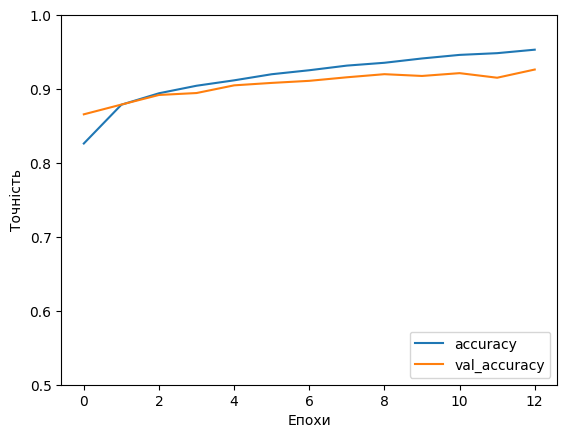

In [60]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

**ВИСНОВКИ**

- Модель досягає високої точності (близько 95,32%) на навчальних даних, що свідчить про те, що модель добре вивчає патерни в навчальному наборі даних.

- Точність на тестових даних складає приблизно 92,64%, що свідчить про добру узагальнюваність моделі на невідомих даних. Це досить хороший результат для базової моделі CNN.

- Втрати на валідаційних даних знижуються до крайньої епохи, і точність на навчальних даних продовжує покращуватись. Це вказує на те, що модель занадто добре вивчає деталі та шум у навчальних даних.
- При зміні швидкості навчання, кількості шарів та кількості нейронів модель показувала признаки перенавчання.

- Вважаю дану комбінацію кількості шарів, кількості нейронів та оптимізатор максимально вдалими для подальшого розпізнання обєктів.